In [1]:
# *Import libraries*
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.linear_model import LogisticRegression


#ANN
from keras.models import Sequential
from keras.layers import Dense, Dropout

import tensorflow as tf
from tensorflow import keras


***
## Importing League Datasets

In [2]:
uk = pd.read_csv('LeagueEng.csv')
sp = pd.read_csv('LeagueSpa.csv')
it = pd.read_csv('LeagueItal.csv')
ge = pd.read_csv('LeagueGerm.csv')
be = pd.read_csv('LeagueBelg.csv')
fr = pd.read_csv('LeagueFran.csv')
ne = pd.read_csv('LeagueNether.csv')
pt = pd.read_csv('LeaguePort.csv')
tr = pd.read_csv('LeagueTurk.csv')

## Combining all Leagues together

In [3]:
allres = uk.append([be,ge,tr,sp,ne,fr,pt,it])
allres['Div'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_28884\3100187439.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allres = uk.append([be,ge,tr,sp,ne,fr,pt,it])


array(['E0', 'B1', 'D1', 'T1', 'SP1', 'N1', 'F1', 'P1', 'I1'],
      dtype=object)

In [4]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')
allres = allres.iloc[:,:24].drop(columns='Referee')
allres

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1.0,0.0,H,8.0,22.0,3.0,4.0,12.0,8.0,2.0,5.0,0.0,0.0,0.0,0.0
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1.0,0.0,H,16.0,10.0,8.0,3.0,11.0,9.0,5.0,4.0,1.0,2.0,0.0,0.0
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1.0,0.0,H,14.0,14.0,3.0,8.0,10.0,7.0,7.0,6.0,2.0,1.0,0.0,0.0
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2.0,0.0,H,13.0,4.0,6.0,1.0,15.0,11.0,5.0,2.0,0.0,0.0,0.0,0.0
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0.0,1.0,A,14.0,6.0,6.0,3.0,13.0,15.0,6.0,8.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,I1,22/05/2022,11:30,Spezia,Napoli,0,3,A,0.0,3.0,A,16.0,10.0,4.0,4.0,10.0,9.0,4.0,2.0,1.0,2.0,0.0,0.0
376,I1,22/05/2022,17:00,Inter,Sampdoria,3,0,H,0.0,0.0,D,27.0,9.0,12.0,3.0,6.0,12.0,8.0,2.0,1.0,2.0,0.0,0.0
377,I1,22/05/2022,17:00,Sassuolo,Milan,0,3,A,0.0,3.0,A,15.0,18.0,3.0,12.0,8.0,13.0,3.0,7.0,2.0,1.0,0.0,0.0
378,I1,22/05/2022,20:00,Salernitana,Udinese,0,4,A,0.0,3.0,A,25.0,19.0,10.0,11.0,11.0,12.0,7.0,1.0,1.0,1.0,0.0,0.0


In [5]:
allres = allres.iloc[:,[3,4,7,11,12,13,14,15,16,17,18,19,20,21,22]]
allres

,HomeTeam,AwayTeam,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Brentford,Arsenal,H,8.0,22.0,3.0,4.0,12.0,8.0,2.0,5.0,0.0,0.0,0.0,0.0
1,Man United,Leeds,H,16.0,10.0,8.0,3.0,11.0,9.0,5.0,4.0,1.0,2.0,0.0,0.0
2,Burnley,Brighton,A,14.0,14.0,3.0,8.0,10.0,7.0,7.0,6.0,2.0,1.0,0.0,0.0
3,Chelsea,Crystal Palace,H,13.0,4.0,6.0,1.0,15.0,11.0,5.0,2.0,0.0,0.0,0.0,0.0
4,Everton,Southampton,H,14.0,6.0,6.0,3.0,13.0,15.0,6.0,8.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Spezia,Napoli,A,16.0,10.0,4.0,4.0,10.0,9.0,4.0,2.0,1.0,2.0,0.0,0.0
376,Inter,Sampdoria,H,27.0,9.0,12.0,3.0,6.0,12.0,8.0,2.0,1.0,2.0,0.0,0.0
377,Sassuolo,Milan,A,15.0,18.0,3.0,12.0,8.0,13.0,3.0,7.0,2.0,1.0,0.0,0.0
378,Salernitana,Udinese,A,25.0,19.0,10.0,11.0,11.0,12.0,7.0,1.0,1.0,1.0,0.0,0.0


In [6]:
allres.isnull().sum()

HomeTeam    0
AwayTeam    0
FTR         0
HS          3
AS          3
HST         3
AST         3
HF          3
AF          3
HC          3
AC          3
HY          2
AY          2
HR          2
AR          2
dtype: int64

In [7]:
allres.replace(["NaN", 'NaT'], np.nan, inplace = True)
allres = allres.dropna()
allres.dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_28884\2308673282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allres.replace(["NaN", 'NaT'], np.nan, inplace = True)


,HomeTeam,AwayTeam,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Brentford,Arsenal,H,8.0,22.0,3.0,4.0,12.0,8.0,2.0,5.0,0.0,0.0,0.0,0.0
1,Man United,Leeds,H,16.0,10.0,8.0,3.0,11.0,9.0,5.0,4.0,1.0,2.0,0.0,0.0
2,Burnley,Brighton,A,14.0,14.0,3.0,8.0,10.0,7.0,7.0,6.0,2.0,1.0,0.0,0.0
3,Chelsea,Crystal Palace,H,13.0,4.0,6.0,1.0,15.0,11.0,5.0,2.0,0.0,0.0,0.0,0.0
4,Everton,Southampton,H,14.0,6.0,6.0,3.0,13.0,15.0,6.0,8.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Spezia,Napoli,A,16.0,10.0,4.0,4.0,10.0,9.0,4.0,2.0,1.0,2.0,0.0,0.0
376,Inter,Sampdoria,H,27.0,9.0,12.0,3.0,6.0,12.0,8.0,2.0,1.0,2.0,0.0,0.0
377,Sassuolo,Milan,A,15.0,18.0,3.0,12.0,8.0,13.0,3.0,7.0,2.0,1.0,0.0,0.0
378,Salernitana,Udinese,A,25.0,19.0,10.0,11.0,11.0,12.0,7.0,1.0,1.0,1.0,0.0,0.0


In [8]:
allres['FTR'].value_counts()

H    1339
A    1000
D     782
Name: FTR, dtype: int64

In [9]:
allres['FTR']= allres['FTR'].replace(['H','A','D'],[1,2,0])


C:\Users\User\AppData\Local\Temp\ipykernel_28884\766578795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allres['FTR']= allres['FTR'].replace(['H','A','D'],[1,2,0])


In [10]:
HomeStats = allres[['HomeTeam','HS','HST','HF','HC','HY','HR']].groupby('HomeTeam').mean().reset_index()
HomeStats

,HomeTeam,HS,HST,HF,HC,HY,HR
0,AZ Alkmaar,13.823529,5.294118,10.235294,5.352941,1.352941,0.000000
1,Ad. Demirspor,15.473684,5.526316,12.157895,5.000000,1.526316,0.000000
2,Ajax,23.176471,9.176471,7.764706,7.764706,0.941176,0.058824
3,Alanyaspor,15.736842,5.736842,12.526316,6.421053,1.631579,0.210526
4,Alaves,11.894737,3.684211,14.263158,3.842105,2.526316,0.105263
...,...,...,...,...,...,...,...
167,Willem II,11.235294,3.470588,7.647059,4.764706,0.823529,0.117647
168,Wolfsburg,13.411765,4.823529,12.058824,4.764706,1.941176,0.058824
169,Wolves,11.736842,3.736842,9.315789,4.631579,1.631579,0.052632
170,Yeni Malatyaspor,11.526316,3.473684,9.789474,4.263158,2.263158,0.210526


In [11]:
AwayStats = allres[allres.columns[~allres.columns.isin(HomeStats)]].drop('FTR',axis=1).groupby('AwayTeam').mean().reset_index()
AwayStats



,AwayTeam,AS,AST,AF,AC,AY,AR
0,AZ Alkmaar,13.117647,4.882353,9.941176,5.470588,1.705882,0.058824
1,Ad. Demirspor,13.421053,4.842105,11.842105,4.578947,1.684211,0.105263
2,Ajax,16.941176,5.764706,9.117647,6.764706,1.176471,0.000000
3,Alanyaspor,11.473684,4.105263,10.105263,3.473684,2.105263,0.052632
4,Alaves,8.210526,2.631579,13.578947,3.473684,2.315789,0.052632
...,...,...,...,...,...,...,...
167,Willem II,9.470588,2.588235,9.882353,4.588235,1.647059,0.235294
168,Wolfsburg,11.294118,3.705882,12.235294,3.882353,1.588235,0.117647
169,Wolves,9.421053,3.421053,9.894737,4.210526,1.473684,0.052632
170,Yeni Malatyaspor,9.105263,3.157895,11.947368,2.684211,1.736842,0.052632


In [12]:
matches = pd.merge(allres.iloc[:,:3],HomeStats,'left',left_on='HomeTeam', right_on='HomeTeam')
matches = pd.merge(matches,AwayStats,'left',left_on='AwayTeam', right_on='AwayTeam')
matches

,HomeTeam,AwayTeam,FTR,HS,HST,HF,HC,HY,HR,AS,AST,AF,AC,AY,AR
0,Brentford,Arsenal,1,12.263158,4.052632,9.842105,4.631579,1.526316,0.105263,12.684211,4.263158,9.684211,4.315789,1.526316,0.157895
1,Man United,Leeds,1,14.684211,5.263158,8.894737,5.000000,1.631579,0.052632,11.631579,4.157895,12.263158,3.947368,2.473684,0.052632
2,Burnley,Brighton,2,12.052632,3.842105,10.578947,5.368421,1.789474,0.000000,11.052632,4.473684,9.736842,4.421053,2.052632,0.052632
3,Chelsea,Crystal Palace,1,17.157895,6.052632,11.210526,7.263158,1.684211,0.000000,9.526316,3.473684,10.789474,4.473684,1.736842,0.052632
4,Everton,Southampton,1,11.947368,4.000000,8.789474,4.894737,2.157895,0.263158,12.947368,4.368421,10.315789,6.263158,1.684211,0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,Spezia,Napoli,2,10.736842,3.421053,13.789474,3.894737,2.421053,0.105263,12.684211,4.842105,12.578947,4.105263,1.842105,0.052632
3117,Inter,Sampdoria,1,19.789474,8.052632,12.315789,7.105263,1.526316,0.000000,9.315789,2.947368,13.000000,3.368421,2.315789,0.105263
3118,Sassuolo,Milan,2,15.578947,5.578947,11.421053,5.789474,2.157895,0.105263,15.368421,5.736842,12.421053,5.105263,2.473684,0.105263
3119,Salernitana,Udinese,2,12.000000,3.421053,12.894737,5.789474,2.000000,0.157895,13.315789,5.315789,14.263158,5.105263,2.578947,0.157895


***
# **ML**
![](Champions-League-Predictions-2023.jpg)
***

## **Data Splitting**

In [13]:
X = matches.iloc[:,3:]
y = matches.iloc[:,2]

In [14]:
X

,HS,HST,HF,HC,HY,HR,AS,AST,AF,AC,AY,AR
0,12.263158,4.052632,9.842105,4.631579,1.526316,0.105263,12.684211,4.263158,9.684211,4.315789,1.526316,0.157895
1,14.684211,5.263158,8.894737,5.000000,1.631579,0.052632,11.631579,4.157895,12.263158,3.947368,2.473684,0.052632
2,12.052632,3.842105,10.578947,5.368421,1.789474,0.000000,11.052632,4.473684,9.736842,4.421053,2.052632,0.052632
3,17.157895,6.052632,11.210526,7.263158,1.684211,0.000000,9.526316,3.473684,10.789474,4.473684,1.736842,0.052632
4,11.947368,4.000000,8.789474,4.894737,2.157895,0.263158,12.947368,4.368421,10.315789,6.263158,1.684211,0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...
3116,10.736842,3.421053,13.789474,3.894737,2.421053,0.105263,12.684211,4.842105,12.578947,4.105263,1.842105,0.052632
3117,19.789474,8.052632,12.315789,7.105263,1.526316,0.000000,9.315789,2.947368,13.000000,3.368421,2.315789,0.105263
3118,15.578947,5.578947,11.421053,5.789474,2.157895,0.105263,15.368421,5.736842,12.421053,5.105263,2.473684,0.105263
3119,12.000000,3.421053,12.894737,5.789474,2.000000,0.157895,13.315789,5.315789,14.263158,5.105263,2.578947,0.157895


In [15]:
y

0       1
1       1
2       2
3       1
4       1
       ..
3116    2
3117    1
3118    2
3119    2
3120    0
Name: FTR, Length: 3121, dtype: int64

## **Standardization**

In [16]:
col_names = list(X.columns)
scaler = StandardScaler()
X_norm= scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=col_names) 

In [17]:
# X_norm

In [18]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# **K-Nearest Neighbourgh**

**Finding out what's the best number of K (hyperparameter tuning)**

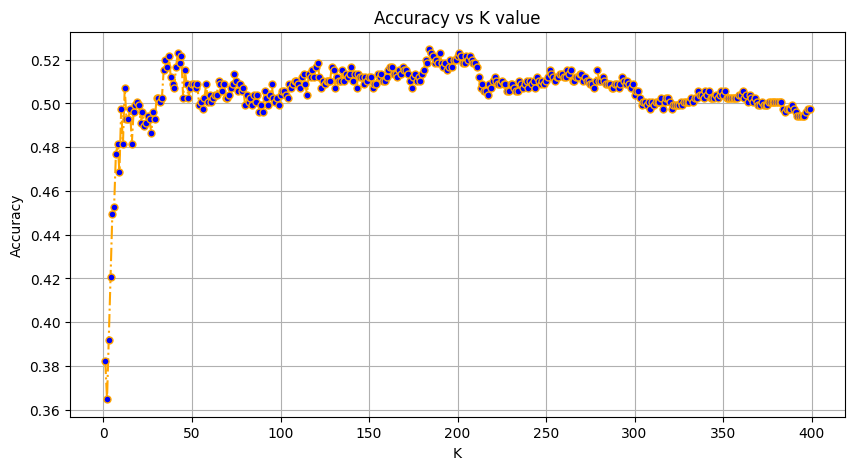

In [19]:
acc = []
for i in range(1,400):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred_knn)
    acc.append(accuracy)

plt.figure(figsize=(10,5))
plt.plot(range(1,400),acc ,color = 'orange', linestyle = 'dashdot', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy vs K value')
plt.show()

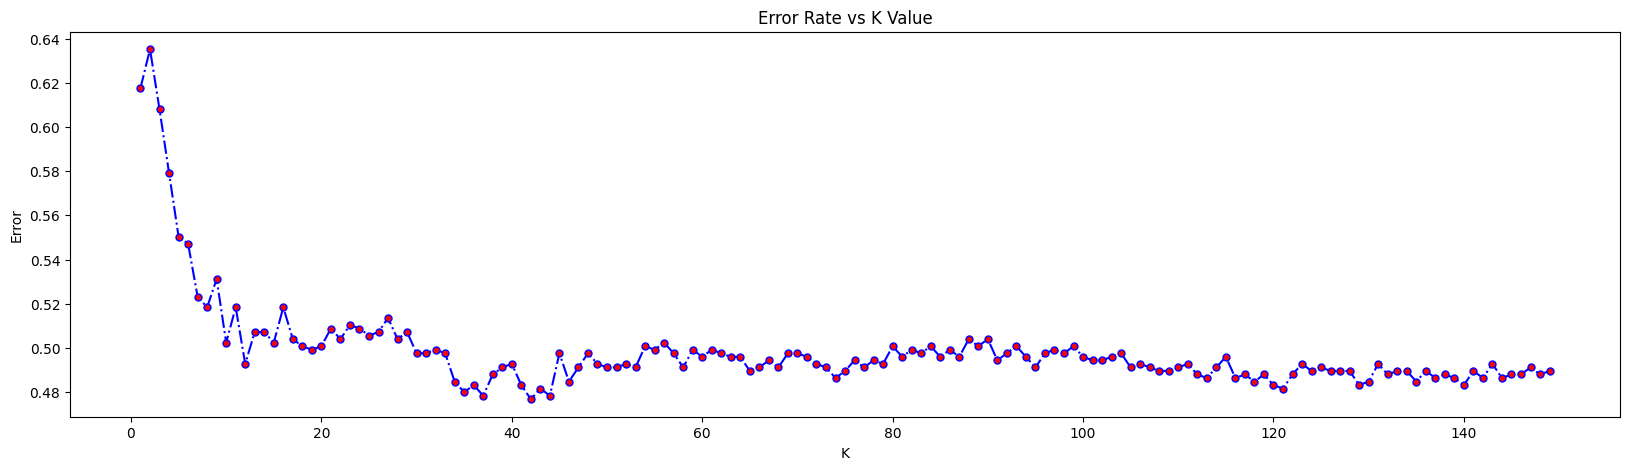

In [20]:
error = []
for i in range(1,150):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    error.append(np.mean(y_pred_knn != y_test))

plt.figure(figsize=(20,5))
plt.plot(range(1,150), error, color = 'blue', linestyle = 'dashdot', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

**According to the above graphs, the best k=132, because gives the minimal error and maximum accuracy score**

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=35)

#train and test
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=42)

In [22]:
y_pred_knn = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)


In [23]:
accuracy_sc = accuracy_score(y_test, y_pred_knn)
print("Accruracy:", round(accuracy_sc,3))

Accruracy: 0.523


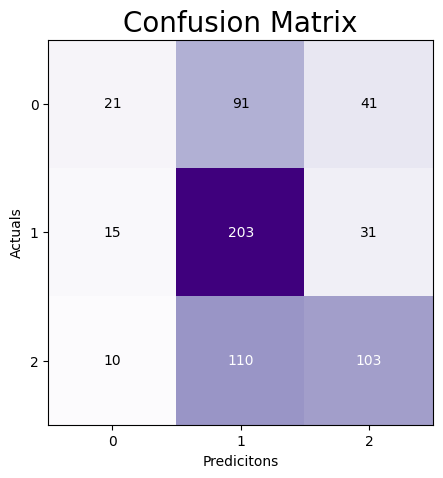

In [24]:
# Confusion Matrix
cMatrix = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat =  cMatrix, figsize = (5,5), cmap = plt.cm.Purples)
plt.xlabel('Predicitons', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [25]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.46      0.14      0.21       153
           1       0.50      0.82      0.62       249
           2       0.59      0.46      0.52       223

    accuracy                           0.52       625
   macro avg       0.52      0.47      0.45       625
weighted avg       0.52      0.52      0.48       625



In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, min_samples_split=900, random_state=32)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_rf)
print(accuracy)


0.5008


## MultiClass ROC Curve --> OvR

In [27]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [28]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [29]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

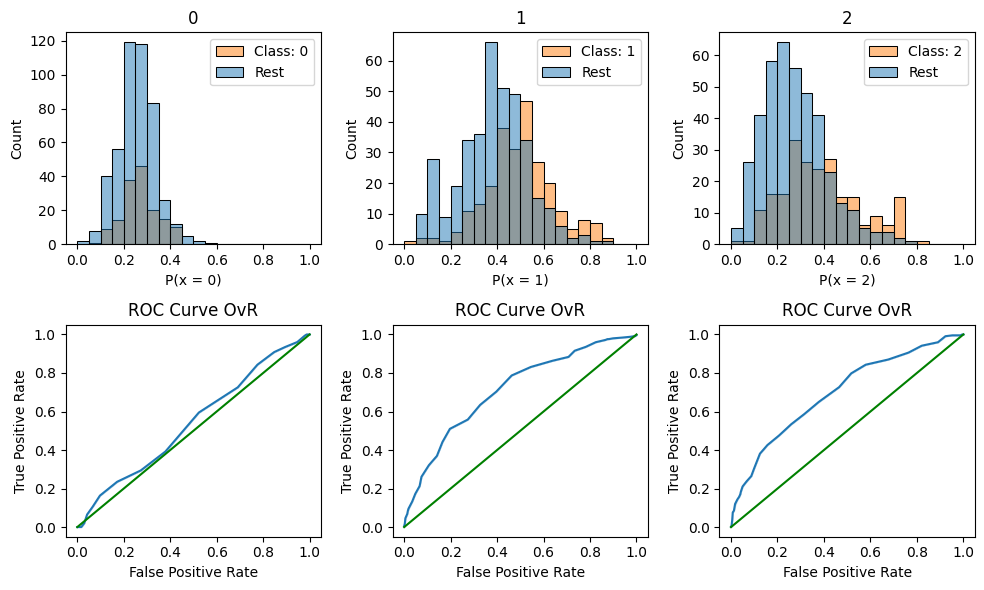

In [30]:

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (10, 6))
bins = [i/20 for i in range(20)] + [1]
classes = knn_model.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()


***

In [31]:
# knn = KNeighborsClassifier()
# from sklearn.model_selection import GridSearchCV
# k_range = list(range(1, 200))
# param_grid = dict(n_neighbors=k_range)


In [32]:
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# grid

In [33]:
# grid_search=grid.fit(X_train, y_train)


In [34]:
#print(grid_search.best_params_)

In [35]:
#accuracy = grid_search.best_score_ 
#print("Accuracy for our training dataset with tuning is : {:.3f}".format(accuracy) )


In [36]:
# knn_model = KNeighborsClassifier(n_neighbors=43)

# #train and test
# knn_model.fit(X_train, y_train)

# y_pred_knn = knn_model.predict(X_test)
# y_proba = knn_model.predict_proba(X_test)

# accuracy_sc = accuracy_score(y_test, y_pred_knn)
# print("Accruracy:", round(accuracy_sc,3))

***

# **ANN**

In [39]:
## Artificial Neural Network
## Initialise the NN
model = Sequential()

## set up the layers
# input layer
model.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=12)) 
# hidden layer
model.add(Dense(units=5, kernel_initializer='uniform', activation='relu')) 
# Dropout - to avoid overfitting (regularizator)
model.add(Dropout(0.2))
# Output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) 

## Compiling the ANN
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, batch_size=15, epochs=100, validation_split=0.3)  ## 30% of our training data to use as validation data


Epoch 1/100


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


 94/117 [=======================>......] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.4113

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


117/117 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4116 - val_loss: 0.0000e+00 - val_accuracy: 0.4299
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4396 - val_loss: 0.0000e+00 - val_accuracy: 0.4299
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4396 - val_loss: 0.0000e+00 - val_accuracy: 0.4299
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4396 - val_loss: 0.0000e+00 - val_accuracy: 0.4299
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4396 - val_loss: 0.0000e+00 - val_accuracy: 0.4299
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4396 - val_loss: 0.0000e+00 - val_accuracy: 0.4299
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4396 -

In [41]:
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')


y_pred_ann = model.predict(X_test)
pd.DataFrame(y_pred_ann, columns=['Y_Pred'])

20/20 [==============================] - 0s 2ms/step


,Y_Pred
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
620,1.0
621,1.0
622,1.0
623,1.0


In [42]:
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)
pd.DataFrame(y_pred_ann).head()

,0
0,1
1,1
2,1
3,1
4,1


In [43]:
y_test

233     1
2677    2
1407    2
1144    1
163     0
       ..
500     1
1966    0
623     2
2118    1
1778    2
Name: FTR, Length: 625, dtype: int64

In [44]:
print(y_test.shape)
print(y_pred_ann.shape)

(625,)
(625, 1)


In [45]:
# Classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       153
           1       0.40      1.00      0.57       249
           2       0.00      0.00      0.00       223

    accuracy                           0.40       625
   macro avg       0.13      0.33      0.19       625
weighted avg       0.16      0.40      0.23       625



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

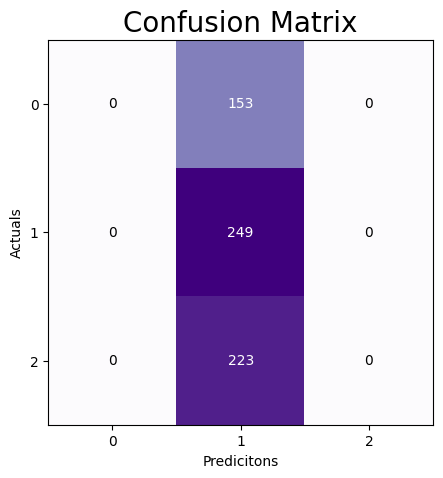

In [46]:
# Confusion Matrix
cMatrix = confusion_matrix(y_test, y_pred_ann)
fig, ax = plot_confusion_matrix(conf_mat =  cMatrix, figsize = (5,5), cmap = plt.cm.Purples)
plt.xlabel('Predicitons', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

***
I need to bring 2022/2023 Champions League groups
***

In [48]:
cl = pd.read_excel('CLGroups.xlsx')

In [49]:
xls = pd.ExcelFile('Dict.xlsx')

uk_dict = pd.read_excel(xls,'Eng')
sp_dict = pd.read_excel(xls,'Spa')
it_dict = pd.read_excel(xls,'Ita')
ge_dict = pd.read_excel(xls,'Ger')
be_dict = pd.read_excel(xls,'Bel')
fr_dict = pd.read_excel(xls,'Fra')
ne_dict = pd.read_excel(xls,'Net')
pt_dict = pd.read_excel(xls,'Por')
tr_dict = pd.read_excel(xls,'Tur')

In [52]:
sp = pd.merge(sp_dict, cl, 'right', left_on='TeamDest', right_on= 'HomeTeam').drop(columns = ['TeamDest'])
sp = pd.merge(sp_dict, cl, 'right', left_on='TeamDest', right_on= 'AwayTeam').drop(columns = ['TeamDest'])

## UK
uk = pd.merge(uk_dict, cl, 'right', left_on='TeamDest', right_on= 'HomeTeam').drop(columns = ['TeamDest'])
uk = pd.merge(uk_dict, cl, 'right', left_on='TeamDest', right_on= 'AwayTeam').drop(columns = ['TeamDest'])

# ## Italy
it = pd.merge(it_dict, cl, 'right', left_on='TeamDest', right_on= 'HomeTeam').drop(columns = ['TeamDest'])
it = pd.merge(it_dict, cl, 'right', left_on='TeamDest', right_on= 'AwayTeam').drop(columns = ['TeamDest'])

# ## Germany
ge = pd.merge(ge_dict, cl, 'right', left_on='TeamDest', right_on= 'HomeTeam').drop(columns = ['TeamDest'])
ge = pd.merge(ge_dict, cl, 'right', left_on='TeamDest', right_on= 'AwayTeam').drop(columns = ['TeamDest'])

# ## Belgium
be = pd.merge(be_dict, cl, 'right', left_on='TeamDest', right_on= 'HomeTeam').drop(columns = ['TeamDest'])
be = pd.merge(be_dict, cl, 'right', left_on='TeamDest', right_on= 'AwayTeam').drop(columns = ['TeamDest'])

# ## France
fr = pd.merge(fr_dict, cl, 'right', left_on='TeamDest', right_on= 'HomeTeam').drop(columns = ['TeamDest'])
fr = pd.merge(fr_dict, cl, 'right', left_on='TeamDest', right_on= 'AwayTeam').drop(columns = ['TeamDest'])

# ## Netherlands
ne = pd.merge(ne_dict, cl, 'right', left_on='TeamDest', right_on= 'HomeTeam').drop(columns = ['TeamDest'])
ne = pd.merge(ne_dict, cl, 'right', left_on='TeamDest', right_on= 'AwayTeam').drop(columns = ['TeamDest'])

# ## Portugal
pt = pd.merge(pt_dict, cl, 'right', left_on='TeamDest', right_on= 'HomeTeam').drop(columns = ['TeamDest'])
pt = pd.merge(pt_dict, cl, 'right', left_on='TeamDest', right_on= 'AwayTeam').drop(columns = ['TeamDest'])

# ## Turkey
tr = pd.merge(tr_dict, cl, 'right', left_on='TeamDest', right_on= 'HomeTeam').drop(columns = ['TeamDest'])
tr = pd.merge(tr_dict, cl, 'right', left_on='TeamDest', right_on= 'AwayTeam').drop(columns = ['TeamDest'])


In [53]:
cl2 = uk.append([be,ge,tr,sp,ne,fr,pt,it])
cl2


C:\Users\User\AppData\Local\Temp\ipykernel_28884\3399400241.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cl2 = uk.append([be,ge,tr,sp,ne,fr,pt,it])


,Team,Group,HomeTeam,AwayTeam
0,NaN,A,Ajax,Rangers FC
1,Liverpool,A,Napoli,Liverpool
2,NaN,A,Liverpool,Ajax
3,NaN,A,Rangers FC,Napoli
4,NaN,A,Ajax,Napoli
...,...,...,...,...
79,Juventus,H,Paris Saint-Germain,Juventus
80,NaN,H,Juventus,SL Benfica
81,NaN,H,Paris Saint-Germain,SL Benfica
82,Juventus,H,SL Benfica,Juventus


In [54]:
nan = cl2[cl2['Team'].isna()]
cl2=cl2[~cl2.isin(nan)].dropna(how = 'all')


ValueError: cannot compute isin with a duplicate axis.

In [47]:
table1=pd.merge(cl, HomeStats,'left', left_on='HomeTeam',right_on='HomeClubName')
clmatches=pd.merge(table1, AwayStats,'left',left_on='AwayTeam',right_on='AwayClubName')
clmatches

KeyError: 'HomeClubName'

In [ ]:
clmatches=clmatches.drop(['HomeClubName','AwayClubName'],axis=1)


In [ ]:
scaler.fit(clmatches.iloc[:,3:])
scaled_feat=scaler.transform(clmatches.iloc[:,3:])
Xcl=pd.DataFrame(scaled_feat,columns = list(clmatches.iloc[:,3:].columns))

predcl=knn_model.predict(Xcl)

In [ ]:
clmatches['Results']=predcl
clresults=clmatches[['Group','HomeTeam','AwayTeam','Results']]
clresults['Homepts']=0
clresults['Awaypts']=0
clresults['Homepts'][clresults['Results']==1]=3
clresults['Awaypts'][clresults['Results']==2]=3
clresults['Homepts'][clresults['Results']==0]=1
clresults['Awaypts'][clresults['Results']==0]=1
clresults
# #clresults[clresults['Group']=='A']


C:\Users\User\AppData\Local\Temp\ipykernel_14776\2811382480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Homepts']=0
C:\Users\User\AppData\Local\Temp\ipykernel_14776\2811382480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Awaypts']=0
C:\Users\User\AppData\Local\Temp\ipykernel_14776\2811382480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Group,HomeTeam,AwayTeam,Results,Homepts,Awaypts
0,A,Ajax,Rangers FC,1,3,0
1,A,Napoli,Liverpool,1,3,0
2,A,Liverpool,Ajax,1,3,0
3,A,Rangers FC,Napoli,2,0,3
4,A,Ajax,Napoli,1,3,0
...,...,...,...,...,...,...
79,H,Paris Saint-Germain,Juventus,1,3,0
80,H,Juventus,SL Benfica,1,3,0
81,H,Paris Saint-Germain,SL Benfica,1,3,0
82,H,SL Benfica,Juventus,1,3,0


In [ ]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
hpts = clresults[['Group','HomeTeam','Homepts']].groupby(['Group','HomeTeam']).sum().reset_index()
apts = clresults[['Group','AwayTeam','Awaypts']].groupby(['Group','AwayTeam']).sum().reset_index()


In [ ]:
clpred = pd.concat([hpts, apts], axis=1)
clpred['Totalpts'] = clpred['Homepts'] + clpred['Awaypts']
clpred.drop(['Homepts','AwayTeam','Awaypts'],axis= 1, inplace=True)
clpred = clpred.loc[:,~clpred.columns.duplicated()]
clpred = clpred.groupby(['Group','HomeTeam']).sum()
#clpred.sort_values(['Group','Totalpts'],ascending=False).groupby('Group')
clpred.sort_values(['Group','Totalpts'], ascending=False)

Totalpts
Group HomeTeam                        
H     Paris Saint-Germain            9
      Juventus                       6
      SL Benfica                     3
G     Manchester City               12
      Borussia Dortmund              3
      Sevilla FC                     3
F     RB Leipzig                    18
      Real Madrid CF                12
      Celtic                         6
      Shakhtar Donetsk               0
E     AC Milan                      15
      Chelsea                       15
      Dinamo Zagreb                  3
      FC Red Bull Salzburg           3
D     Tottenham Hotspur             16
      Sporting CP                   13
      Eintracht Frankfurt            4
      Olympique de Marseille         1
C     FC Bayern München             15
      Inter                         12
      FC Barcelona                   9
      FC Viktoria Plzeň              0
B     Bayer 04 Leverkusen           15
      Club Brugge KV                10
      Atlético de Madrid             7
      FC Porto                       3
A     Liverpool                     15
      Napoli                        12
      Ajax                           9
      Rangers FC                     0

In [ ]:
cl_groups = clpred.sort_values(['Group','Totalpts'],ascending=False).groupby('Group').head(2)
cl_groups

Totalpts
Group HomeTeam                     
H     Paris Saint-Germain         9
      Juventus                    6
G     Manchester City            12
      Borussia Dortmund           3
F     RB Leipzig                 18
      Real Madrid CF             12
E     AC Milan                   15
      Chelsea                    15
D     Tottenham Hotspur          16
      Sporting CP                13
C     FC Bayern München          15
      Inter                      12
B     Bayer 04 Leverkusen        15
      Club Brugge KV             10
A     Liverpool                  15
      Napoli                     12

***
## **Knock out**

In [ ]:
#cl_groups.reset_index()
first = cl_groups.groupby('Group').head(1).reset_index()
first = first[["HomeTeam"]]
first.rename(columns={'HomeTeam':'First'}, inplace=True)
first

,First
0,Paris Saint-Germain
1,Manchester City
2,RB Leipzig
3,AC Milan
4,Tottenham Hotspur
5,FC Bayern München
6,Bayer 04 Leverkusen
7,Liverpool


In [ ]:
second = cl_groups.sort_values(['Group','Totalpts','HomeTeam'],ascending=[True,True,False]).groupby('Group').head(1).reset_index()
second = second[["HomeTeam"]]
second.rename(columns={'HomeTeam':'Second'}, inplace=True)
second


,Second
0,Napoli
1,Club Brugge KV
2,Inter
3,Sporting CP
4,Chelsea
5,Real Madrid CF
6,Borussia Dortmund
7,Juventus


In [ ]:
# Shuffling the order
second = second.reindex(np.random.permutation(second.index))
second = second.reset_index().iloc[:,1:]
second

,Second
0,Real Madrid CF
1,Inter
2,Club Brugge KV
3,Sporting CP
4,Chelsea
5,Borussia Dortmund
6,Juventus
7,Napoli


In [ ]:
roundof16matches = pd.concat([first,second],axis=1).sort_index()
roundof16matches


,First,Second
0,Paris Saint-Germain,Real Madrid CF
1,Manchester City,Inter
2,RB Leipzig,Club Brugge KV
3,AC Milan,Sporting CP
4,Tottenham Hotspur,Chelsea
5,FC Bayern München,Borussia Dortmund
6,Bayer 04 Leverkusen,Juventus
7,Liverpool,Napoli


*** 
# **ML Binary Classification Problem**
because for knock out rounds I need just Win and Loss (0,1)

In [ ]:
binary = matches.query('FTR!=0')
binary

,FTR,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,1,71.032258,76.741935,1.354839,1.354839,70.419355,57.000000,63.064516,67.612903,56.870968,69.096774,74.931034,82.448276,1.379310,1.379310,72.310345,59.241379,68.551724,73.275862,56.310345,66.379310
1,1,77.181818,82.636364,1.424242,1.151515,73.878788,63.333333,70.030303,74.060606,60.151515,71.121212,72.320000,79.960000,1.480000,1.480000,71.840000,58.320000,65.040000,70.440000,55.080000,69.320000
2,2,70.100000,75.466667,1.366667,1.233333,68.866667,57.000000,64.000000,68.933333,56.366667,66.600000,69.206897,78.413793,1.275862,1.034483,68.379310,54.241379,61.724138,66.413793,55.379310,63.758621
3,1,77.258065,83.387097,1.419355,1.290323,72.806452,62.709677,70.612903,74.709677,59.967742,69.935484,71.655172,77.482759,1.137931,1.344828,66.827586,58.758621,64.827586,69.344828,58.241379,66.896552
4,1,73.516129,78.064516,1.322581,1.387097,68.064516,60.870968,66.322581,69.322581,58.709677,70.129032,71.275862,78.793103,1.448276,1.275862,72.103448,56.965517,62.413793,68.793103,56.517241,67.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1,74.724138,79.034483,1.344828,1.241379,73.068966,62.620690,68.793103,73.689655,59.068966,69.517241,77.354839,82.451613,1.354839,1.193548,73.677419,66.483871,68.387097,75.129032,58.161290,71.645161
3119,2,68.416667,74.375000,1.375000,1.208333,67.125000,55.666667,61.416667,65.583333,53.333333,66.083333,77.240000,81.000000,1.280000,1.040000,75.480000,62.320000,67.960000,74.920000,59.880000,70.400000
3120,1,79.730769,82.653846,1.230769,1.269231,74.769231,64.692308,70.846154,75.423077,66.153846,75.115385,70.961538,74.576923,1.192308,1.153846,66.230769,56.346154,62.692308,68.384615,57.384615,67.423077
3121,2,71.354839,77.000000,1.161290,1.032258,70.290323,58.161290,61.967742,69.838710,53.064516,63.161290,77.312500,82.375000,1.500000,1.250000,73.625000,65.562500,70.000000,74.375000,60.843750,72.750000


In [ ]:
map_FTR = {1:0, 2:1}
binary['FTR'] = binary['FTR'].map(map_FTR)
binary

C:\Users\User\AppData\Local\Temp\ipykernel_14776\1903730983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary['FTR'] = binary['FTR'].map(map_FTR)


,FTR,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,0,71.032258,76.741935,1.354839,1.354839,70.419355,57.000000,63.064516,67.612903,56.870968,69.096774,74.931034,82.448276,1.379310,1.379310,72.310345,59.241379,68.551724,73.275862,56.310345,66.379310
1,0,77.181818,82.636364,1.424242,1.151515,73.878788,63.333333,70.030303,74.060606,60.151515,71.121212,72.320000,79.960000,1.480000,1.480000,71.840000,58.320000,65.040000,70.440000,55.080000,69.320000
2,1,70.100000,75.466667,1.366667,1.233333,68.866667,57.000000,64.000000,68.933333,56.366667,66.600000,69.206897,78.413793,1.275862,1.034483,68.379310,54.241379,61.724138,66.413793,55.379310,63.758621
3,0,77.258065,83.387097,1.419355,1.290323,72.806452,62.709677,70.612903,74.709677,59.967742,69.935484,71.655172,77.482759,1.137931,1.344828,66.827586,58.758621,64.827586,69.344828,58.241379,66.896552
4,0,73.516129,78.064516,1.322581,1.387097,68.064516,60.870968,66.322581,69.322581,58.709677,70.129032,71.275862,78.793103,1.448276,1.275862,72.103448,56.965517,62.413793,68.793103,56.517241,67.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,0,74.724138,79.034483,1.344828,1.241379,73.068966,62.620690,68.793103,73.689655,59.068966,69.517241,77.354839,82.451613,1.354839,1.193548,73.677419,66.483871,68.387097,75.129032,58.161290,71.645161
3119,1,68.416667,74.375000,1.375000,1.208333,67.125000,55.666667,61.416667,65.583333,53.333333,66.083333,77.240000,81.000000,1.280000,1.040000,75.480000,62.320000,67.960000,74.920000,59.880000,70.400000
3120,0,79.730769,82.653846,1.230769,1.269231,74.769231,64.692308,70.846154,75.423077,66.153846,75.115385,70.961538,74.576923,1.192308,1.153846,66.230769,56.346154,62.692308,68.384615,57.384615,67.423077
3121,1,71.354839,77.000000,1.161290,1.032258,70.290323,58.161290,61.967742,69.838710,53.064516,63.161290,77.312500,82.375000,1.500000,1.250000,73.625000,65.562500,70.000000,74.375000,60.843750,72.750000


In [ ]:
X = binary.iloc[:,1:]
y = binary.iloc[:,0]

col_names = list(X.columns)
scaler = StandardScaler()
X_norm= scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=col_names) 

## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=32)

## Logistic Regression

In [ ]:
## Train the logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
pred_LR = model_LR.predict(X_test)


In [ ]:
accuracy_LR = accuracy_score(y_test, pred_LR)
print("Accuracy:", round(accuracy_LR,3))

Accuracy: 0.694


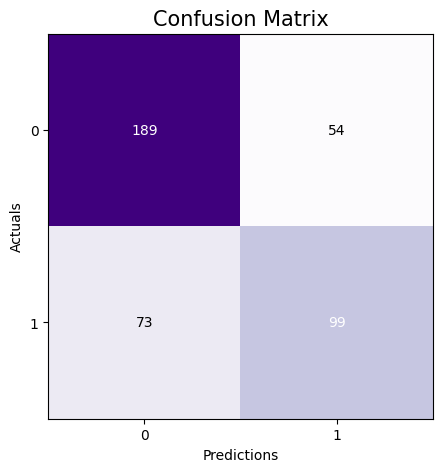

In [ ]:
# Plotting a confusion matrix
cm = confusion_matrix(y_test, pred_LR)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5), cmap = plt.cm.Purples)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_test, pred_LR),'\n')
auc = roc_auc_score(y_test, pred_LR)
print('AUC: %f' %auc)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       243
           1       0.65      0.58      0.61       172

    accuracy                           0.69       415
   macro avg       0.68      0.68      0.68       415
weighted avg       0.69      0.69      0.69       415
 

AUC: 0.676680


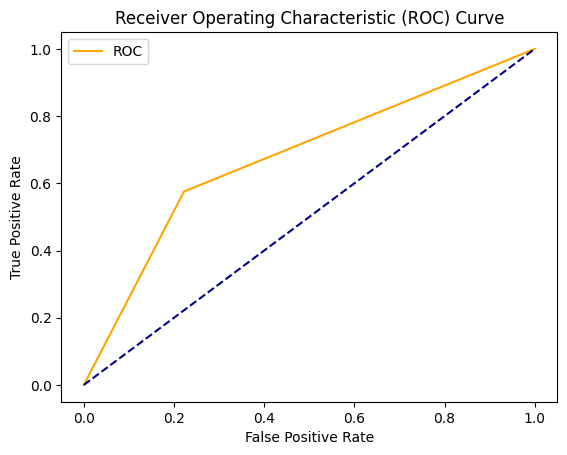

In [ ]:
fpr, tpr = roc_curve(y_test, pred_LR)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## I can now apply this new binary model (LR) to the knock out matches

In [ ]:
table1=pd.merge(roundof16matches, HomeStats,'left', left_on='First',right_on='HomeClubName')
rounfof16total=pd.merge(table1, AwayStats,'left',left_on='Second',right_on='AwayClubName')

rounfof16total

,First,Second,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,Paris Saint-Germain,Real Madrid CF,Paris Saint-Germain,79.807692,84.230769,1.384615,1.192308,76.076923,67.500000,73.153846,78.500000,60.384615,70.307692,Real Madrid CF,76.705882,83.911765,1.323529,1.205882,75.323529,64.352941,69.882353,74.382353,55.205882,68.088235
1,Manchester City,Inter,Manchester City,78.518519,84.185185,1.518519,1.333333,73.629630,65.259259,72.148148,76.296296,62.259259,70.703704,Inter,79.730769,82.653846,1.230769,1.269231,74.769231,64.692308,70.846154,75.423077,66.153846,75.115385
2,RB Leipzig,Club Brugge KV,RB Leipzig,77.708333,81.916667,1.375000,1.166667,74.541667,63.583333,70.041667,75.625000,59.041667,70.708333,Club Brugge KV,71.928571,78.535714,1.357143,1.357143,72.500000,58.714286,62.821429,69.214286,56.000000,71.571429
3,AC Milan,Sporting CP,AC Milan,77.312500,82.375000,1.500000,1.250000,73.625000,65.562500,70.000000,74.375000,60.843750,72.750000,Sporting CP,73.451613,81.000000,1.387097,1.064516,75.225806,61.419355,65.774194,72.354839,55.000000,67.387097
4,Tottenham Hotspur,Chelsea,Tottenham Hotspur,76.516129,82.161290,1.483871,1.290323,72.838710,62.387097,68.354839,73.548387,63.741935,70.903226,Chelsea,77.258065,83.387097,1.419355,1.290323,72.806452,62.709677,70.612903,74.709677,59.967742,69.935484
5,FC Bayern München,Borussia Dortmund,FC Bayern München,80.590909,84.727273,1.409091,1.090909,77.727273,69.000000,73.909091,78.409091,60.454545,73.318182,Borussia Dortmund,74.529412,82.058824,1.470588,1.147059,74.441176,63.176471,67.058824,73.529412,54.735294,70.382353
6,Bayer 04 Leverkusen,Juventus,Bayer 04 Leverkusen,75.689655,81.034483,1.448276,1.137931,74.172414,62.896552,68.827586,75.241379,56.689655,68.793103,Juventus,77.354839,82.451613,1.354839,1.193548,73.677419,66.483871,68.387097,75.129032,58.161290,71.645161
7,Liverpool,Napoli,Liverpool,78.666667,83.600000,1.466667,1.400000,73.966667,63.700000,71.866667,76.066667,62.966667,71.466667,Napoli,77.240000,81.000000,1.280000,1.040000,75.480000,62.320000,67.960000,74.920000,59.880000,70.400000


In [ ]:
rounfof16total=rounfof16total.drop(['HomeClubName','AwayClubName'],axis=1)

## Standard Scaler
scaler.fit(rounfof16total.iloc[:,2:])
scaled_feat1=scaler.transform(rounfof16total.iloc[:,2:])
Xcl=pd.DataFrame(scaled_feat1,columns = list(rounfof16total.iloc[:,2:].columns))
Xcl



,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,1.115829,0.965917,-1.267347,-0.412050,1.016255,1.159876,1.115398,1.519825,-0.195413,-0.611593,0.288410,1.285371,-0.412742,0.096605,0.965007,0.626044,0.776332,0.348644,-0.808456,-1.113850
1,0.272824,0.929284,1.399267,1.027158,-0.636684,0.126035,0.585297,0.175974,0.691271,-0.313015,1.569503,0.491573,-1.715628,0.713540,0.453422,0.781200,1.157210,0.886571,2.210156,2.045578
2,-0.256966,-0.893775,-1.458832,-0.673724,-0.020680,-0.647210,-0.525022,-0.233393,-0.830613,-0.309524,-1.734864,-2.107134,0.059383,1.569695,-1.640946,-1.951898,-2.014029,-2.322616,-0.589499,0.452204
3,-0.515806,-0.525443,1.030480,0.176717,-0.639811,0.265945,-0.546984,-0.995662,0.021752,1.229816,-1.089829,-0.552070,0.480108,-1.280128,0.874815,-0.715165,-0.847145,-0.699334,-0.865222,-1.429084
4,-1.036562,-0.697187,0.709278,0.588221,-1.170883,-1.199134,-1.414143,-1.499743,1.392560,-0.162583,0.522269,0.954284,0.933197,0.918948,-1.358109,-0.125241,1.065033,0.517831,0.504501,-0.283321
5,1.627984,1.364924,-0.779929,-1.446852,2.130926,1.851951,1.513485,1.464388,-0.162337,1.658204,-0.633363,0.116090,1.652808,-0.476264,0.150647,0.088173,-0.339481,-0.092223,-0.938208,-0.082408
6,-1.577003,-1.602728,0.000420,-0.966980,-0.270079,-0.964080,-1.164960,-0.467331,-1.943087,-1.753536,0.563255,0.363956,0.027020,-0.023513,-0.554256,1.600286,0.185431,0.734586,0.006420,0.485355
7,0.369699,0.459009,0.366663,1.707511,-0.409044,-0.593382,0.436930,0.035942,1.025867,0.262231,0.514619,-0.552070,-1.024145,-1.518885,1.109420,-0.303398,0.016649,0.626542,0.480309,-0.074474


In [ ]:
predcl=model_LR.predict(Xcl)

In [ ]:
rounfof16total['Results']=predcl
rounfof16total=rounfof16total[['First','Second','Results']]
rounfof16total

,First,Second,Results
0,Paris Saint-Germain,Real Madrid CF,0
1,Manchester City,Inter,1
2,RB Leipzig,Club Brugge KV,0
3,AC Milan,Sporting CP,0
4,Tottenham Hotspur,Chelsea,1
5,FC Bayern München,Borussia Dortmund,0
6,Bayer 04 Leverkusen,Juventus,1
7,Liverpool,Napoli,0


In [ ]:
rounfof16total['quarterfinal'] = 0
rounfof16total['quarterfinal'][rounfof16total['Results']==0]=rounfof16total.loc[:,'First'].values
rounfof16total['quarterfinal'][rounfof16total['Results']==1]=rounfof16total.loc[:,'Second'].values

quarterfinal = rounfof16total[['quarterfinal']]
quarterfinal

C:\Users\User\AppData\Local\Temp\ipykernel_14776\3972922664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rounfof16total['quarterfinal'][rounfof16total['Results']==0]=rounfof16total.loc[:,'First'].values


,quarterfinal
0,Paris Saint-Germain
1,Inter
2,RB Leipzig
3,AC Milan
4,Chelsea
5,FC Bayern München
6,Juventus
7,Liverpool


In [ ]:
second = quarterfinal.iloc[1::2].reset_index().iloc[:,1:]
first = quarterfinal.iloc[::2].reset_index().iloc[:,1:]
print(first)
print(second)



          quarterfinal
0  Paris Saint-Germain
1           RB Leipzig
2              Chelsea
3             Juventus
        quarterfinal
0              Inter
1           AC Milan
2  FC Bayern München
3          Liverpool


In [ ]:
quarterfinal = pd.concat([first,second],axis=1)
quarterfinal.set_axis(['First','Second'], axis=1, inplace=True)
quarterfinal.merge()

C:\Users\User\AppData\Local\Temp\ipykernel_14776\3129796417.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  quarterfinal.set_axis(['First','Second'], axis=1, inplace=True)


TypeError: DataFrame.merge() missing 1 required positional argument: 'right'